## 1. read JSON data

In [1]:
import json

In [2]:
def open_json_file(CACHE_FNAME):
    try:
        cache_file = open(CACHE_FNAME, 'r', encoding='utf-8-sig')
        cache_contents = cache_file.read()
        CACHE_DICTION = json.loads(cache_contents, encoding='utf-8-sig')
        cache_file.close()
        return CACHE_DICTION

    except:
        CACHE_DICTION = {}
        return CACHE_DICTION

In [3]:
job_data = open_json_file('json_data/test_NLP_02.json')
print('所有資料數量: ', len(job_data))

所有資料數量:  135384


In [4]:
lst_jobs = []
lst_jobs_cat = []

for i in job_data:
    if len(i['jobDescription_clean']) > 1:
        lst_jobs.append(i['jobDescription_clean'])
        lst_jobs_cat.append(i['jobCat_main'])


In [5]:
lst_jobs[0:2]

['介紹 銷售 商品 顧客 接待 服務 電話 諮詢 調貨 包裝 退換貨 商品 進貨 入庫 銷售 管理 庫存 管理 商品 包裝 陳列 促銷品 換檔 維持 店櫃 週遭 整潔 提升 業績 淑女 服飾 銷售 服務 百貨 專櫃 門市 店員 專櫃',
 '傢俱 連鎖 事業 系統 傢俱 設計 制度 多元 發展 事業 業務 設計 銷售 系統 傢俱 業主 系統 介紹 工地丈量 繪圖 監工 業主 服務 走向 專業 發展 設計 交通工具 業務 設計 業務']

In [6]:
lst_jobs_cat[0:2]

['客服╱門市╱業務╱貿易類', '客服╱門市╱業務╱貿易類']

## 4. 建立Bag of Words (BOW)

[Python开发 之 Sklearn的模型 和 CountVectorizer 、Transformer 保存 和 使用](https://blog.csdn.net/u014597198/article/details/103037709)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer 
import pickle

In [25]:
# 参数min_df=10表示词必须要在至少10个文档中出现过，否则就不考虑。

vectorizer = TfidfVectorizer(min_df=10, stop_words="english", max_features=10000).fit(lst_jobs) 
transform_content = vectorizer.transform(lst_jobs) 

In [26]:
# 儲存 TfidfVectorizer 模型 

pickle.dump(vectorizer, open("model/TfidfVectorizer.pickel", "wb"))

# 5. data preprocessing

In [27]:
from sklearn import preprocessing

In [28]:
X = transform_content.toarray()

#### label encoding to job category label 

In [29]:
le = preprocessing.LabelEncoder()
le.fit(lst_jobs_cat)
y = le.transform(lst_jobs_cat)

In [30]:
# 儲存 LabelEncoder 模型 

# pickle.dump(le, open("model/le.pickel", "wb"))

## 6. 建立ML model

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## MultinomialNB

[朴素贝叶斯分类器实践](https://lvraikkonen.github.io/2015/08/07/2015-08-07-naive-bayes-classifier/)

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from joblib import dump, load

In [34]:
# MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 
# 参数 alpha，用于控制模型复杂度。alpha 越大，平滑化越强，模型复杂度就越低。

model = MultinomialNB() 
model.fit(X_train, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
# 儲存 MultinomialNB 模型 

# dump(model, 'model/MultinomialNB.joblib') 

In [36]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8351069916466415

In [37]:
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [38]:
# confusion_matrix(y_test, y_pred)

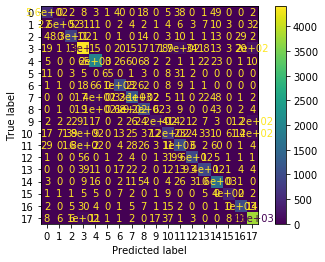

In [39]:
plot_confusion_matrix(model, X_test, y_test)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test, y_pred, labels=[i for i in range(0, 18)]))

              precision    recall  f1-score   support

           0       0.84      0.77      0.81       731
           1       0.93      0.68      0.78       380
           2       0.89      0.90      0.90       920
           3       0.84      0.87      0.85      5066
           4       0.82      0.87      0.85      2265
           5       0.96      0.50      0.66       129
           6       0.81      0.84      0.83      1208
           7       0.78      0.76      0.77      1566
           8       0.70      0.72      0.71      1274
           9       0.77      0.35      0.48       613
          10       0.72      0.57      0.64      1260
          11       0.72      0.74      0.73      1383
          12       0.91      0.89      0.90      1078
          13       0.89      0.88      0.88      1064
          14       0.85      0.93      0.89      1737
          15       0.95      0.91      0.93       443
          16       0.92      0.92      0.92      1088
          17       0.88    

## use cross validation

In [ ]:
# from sklearn.model_selection import cross_val_score

In [ ]:
# #  k 折交叉验证（k-fold cross-validation）

# scores = cross_val_score(model, X, y, cv=5) 
# print("Cross-validation scores: {}".format(scores))

## create Pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline 

In [ ]:
# pipe = make_pipeline(MultinomialNB()) 
# param_grid = {"multinomialnb__alpha": [0.001, 0.01, 0.1, 1] } 
 
# grid = GridSearchCV(pipe, param_grid, cv=5) 
# grid.fit(X_train, y_train) 
# print("Best cross-validation score: {:.2f}".format(grid.best_score_)) 
# print("Best parameters:\n{}".format(grid.best_params_))
